<a href="https://colab.research.google.com/github/blockmoo/python_tutoring/blob/main/%EC%9C%A0%ED%98%B8%EC%84%A0_%EA%B8%88%EC%9C%B5%EA%B3%B5%ED%95%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1번

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from scipy.stats import norm

In [ ]:
# Read Data
test = data.DataReader(['066570.KS','015760.KS','068270.KS','121800.KQ'], 'yahoo', start='2016/01/04', end='2021/05/31')
test = test.fillna(0)
test.head()

Attributes     Adj Close                ...     Volume          
Symbols        066570.KS     015760.KS  ...  068270.KS 121800.KQ
Date                                    ...                     
2016-01-04  50214.957031  44816.449219  ...  2640145.0   94340.0
2016-01-05  51936.609375  45443.875000  ...  1681687.0   81712.0
2016-01-06  52319.195312  45533.507812  ...  2039196.0  135125.0
2016-01-07  52606.140625  45085.343750  ...  3668420.0  142628.0
2016-01-08  53466.968750  44726.812500  ...  3025083.0   71680.0

[5 rows x 24 columns]

In [ ]:
# Closing price
test = test['Adj Close']
test.head()

Symbols,066570.KS,015760.KS,068270.KS,121800.KQ
Date,,,,
2016-01-04,50214.957031,44816.449219,76240.500000,14050.0
2016-01-05,51936.609375,45443.875000,77180.687500,13600.0
2016-01-06,52319.195312,45533.507812,78377.289062,13000.0
2016-01-07,52606.140625,45085.343750,78377.289062,12250.0
2016-01-08,53466.968750,44726.812500,82479.914062,12500.0


In [ ]:
test.columns = ['LG electronics','KEPCO',"Celltrion","Vidente"]
test.tail()

,LG electronics,KEPCO,Celltrion,Vidente
Date,,,,
2021-05-26,152000.0,26250.0,270500.0,0.0
2021-05-27,149500.0,26050.0,269000.0,0.0
2021-05-28,151500.0,25450.0,273500.0,0.0
2021-05-31,152000.0,25800.0,274500.0,0.0
2021-06-01,151500.0,26100.0,272500.0,0.0


In [ ]:
# log return
logreturn = test.pct_change().apply(lambda x: np.log(1+x))
logreturn.tail()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,LG electronics,KEPCO,Celltrion,Vidente
Date,,,,
2021-05-26,-0.009820,0.052798,-0.005530,NaN
2021-05-27,-0.016584,-0.007648,-0.005561,NaN
2021-05-28,0.013289,-0.023302,0.016590,NaN
2021-05-31,0.003295,0.013659,0.003650,NaN
2021-06-01,-0.003295,0.011561,-0.007313,NaN


In [ ]:
# Define weights for allocation
w = [0.2, 0.2, 0.3, 0.3]
e_r_ind = logreturn.mean()
e_r_ind

LG electronics    0.000836
KEPCO            -0.000409
Celltrion         0.000964
Vidente                NaN
dtype: float64

In [ ]:
# Log of percentage change
cov_matrix = test.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,LG electronics,KEPCO,Celltrion,Vidente
LG electronics,0.000584,0.000067,0.000052,-0.000005
KEPCO,0.000067,0.000319,0.000059,-0.000079
Celltrion,0.000052,0.000059,0.000900,0.000256
Vidente,-0.000005,-0.000079,0.000256,0.005790


In [ ]:
corr_matrix = test.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,LG electronics,KEPCO,Celltrion,Vidente
LG electronics,1.000000,0.154921,0.072164,-0.003318
KEPCO,0.154921,1.000000,0.109392,-0.071760
Celltrion,0.072164,0.109392,1.000000,0.116013
Vidente,-0.003318,-0.071760,0.116013,1.000000


In [ ]:
# Randomly weighted portfolio's variance
w = {'	LG electronics': 0.1, 'KEPCO': 0.2, 'Celltrion': 0.5, 'Vidente': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0005259934087767557

In [ ]:
# Yearly returns for individual companies
ind_er = test.resample('Y').last().pct_change().mean()
ind_er

LG electronics    0.368009
KEPCO            -0.084803
Celltrion         0.352519
Vidente           2.157895
dtype: float64

In [ ]:
# Portfolio returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.6276788627389653

In [ ]:
# Volatility is given by the annual standard deviation. We multiply by 1974 because there are 1974 trading days.
date_to_start = datetime.strptime("20160104", "%Y%m%d")
date_to_end = datetime.strptime("20210531", "%Y%m%d")
print(date_to_end - date_to_start)

ann_sd = test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(1974))
ann_sd

1974 days, 0:00:00


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


LG electronics    1.073894
KEPCO             0.793034
Celltrion         1.333110
Vidente                NaN
dtype: float64

In [ ]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
LG electronics,0.368009,1.073894
KEPCO,-0.084803,0.793034
Celltrion,0.352519,1.333110
Vidente,2.157895,NaN


In [ ]:
# We run this loop a 1000 times.
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(test.columns)
num_portfolios = 10000
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 


    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [ ]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(test.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,LG electronics weight,KEPCO weight,Celltrion weight,Vidente weight
0,0.639427,0.346091,0.183469,0.348072,0.226800,0.241659
1,1.012296,0.535643,0.115311,0.238089,0.224465,0.422135
2,0.527289,0.344040,0.000613,0.366168,0.447721,0.185498
3,0.577707,0.308201,0.585666,0.081662,0.193183,0.139488
4,0.780408,0.397897,0.262767,0.246136,0.196721,0.294376


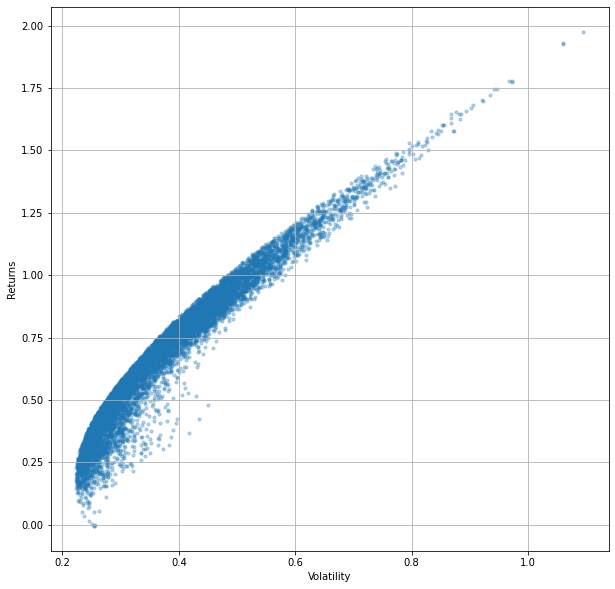

In [ ]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

#Find same expected return of LG electronics & efficient frontier

In [ ]:
# LG electronics expected return
ex_return_LG = ind_er[0]
ex_return_LG

0.3680094371344017

Text(0.5, 0.4180094371344017, 'Same expected return of LG electronics & efficient portfolio')

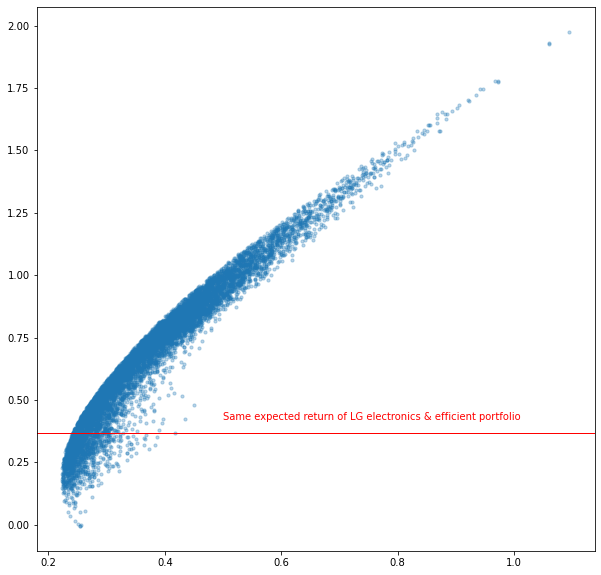

In [ ]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.axhline(y=ex_return_LG, color='r', linewidth=1)
plt.text(0.5, ex_return_LG + 0.05, "Same expected return of LG electronics & efficient portfolio", color = 'red')



In [ ]:
# Round the expected return to three decimal places.
r_p_ret = [i.round(3) for i in p_ret]
point = np.where(r_p_ret == ex_return_LG.round(3))
point

(array([ 849, 3190, 4665, 5670, 7528, 8561, 8585, 9635, 9789, 9964]),)

In [ ]:
# same expected return of LG electronics & efficient frontier
portfolios.iloc[point[0],]

,Returns,Volatility,LG electronics weight,KEPCO weight,Celltrion weight,Vidente weight
849,0.368446,0.259942,0.496858,0.188373,0.264581,0.050189
3190,0.367808,0.304516,0.149796,0.236303,0.549477,0.064424
4665,0.368318,0.417141,0.091026,0.030227,0.863455,0.015292
5670,0.368088,0.257040,0.156165,0.440528,0.289313,0.113994
7528,0.367572,0.294675,0.483981,0.057385,0.440549,0.018086
8561,0.368309,0.252282,0.298107,0.295505,0.328619,0.077769
8585,0.368265,0.242809,0.314390,0.424164,0.152676,0.108771
9635,0.368423,0.295979,0.099945,0.313800,0.502291,0.083964
9789,0.368386,0.244624,0.262762,0.443936,0.179231,0.114070
9964,0.368145,0.273562,0.169551,0.319245,0.426672,0.084532


In [ ]:
ex_return_LG

0.3680094371344017

#Compute VaR

In [ ]:
# Select our confidence interval (I'll choose 95% here)
conf_level1 = 0.05
#Finally, we can calculate the VaR at our confidence interval
port_VaR = p_ret + [i*norm.ppf(conf_level1).round(3) for i in p_vol]
port_VaR[1:5]

[0.8480459818102299,
 0.31631969449346486,
 0.930522636282629,
 0.9877719433869201]

#2번

In [ ]:
sharpratio = (portfolios["Returns"] - 0.02) / portfolios["Volatility"]
np.where(sharpratio == sharpratio.max())

(array([794]),)

In [ ]:
sharpratio[794]

2.0455578518093156

In [ ]:
#Rm : market portfolio = efficient portfolio
Rm = portfolios.iloc[794,][0]
Rm

0.8979952785312846